In [71]:
import pandas as pd
import lime
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense,GlobalAveragePooling2D, Input
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [2]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128,128,3))

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results. 
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

In [4]:
for layer in base_model.layers:
    layer.trainable = False

In [5]:
model=Model(inputs=base_model.input,outputs=preds)

In [72]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model#
#model = Sequential()
#add model layers
#model.add(Conv2D(1024, kernel_size=3, activation='relu', input_shape=(128,128,3)))
#model.add(Conv2D(512, kernel_size=3, activation='relu'))
#model.add(Conv2D(32, kernel_size=3, activation='relu'))
#model.add(GlobalAveragePooling2D())
#model.add(Flatten())
#model.add(Dense(2, activation='softmax'))

input_layer = Input(shape=(128,128,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=2, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [73]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_2
1 conv2d_17
2 conv2d_18
3 flatten_5
4 dense_8


In [74]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('cars',
                                                 target_size=(128,128),
                                                 color_mode='rgb',
                                                 batch_size=10,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 80 images belonging to 2 classes.


In [75]:
train_generator.class_indices

{'normal_car': 0, 'sports_car': 1}

In [76]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=12)

Epoch 1/12
8/8 [==============================] - 1s 90ms/step - loss: 1.1121 - acc: 0.6375
Epoch 2/12
8/8 [==============================] - 0s 13ms/step - loss: 0.0823 - acc: 0.9750
Epoch 3/12
8/8 [==============================] - 0s 12ms/step - loss: 0.0298 - acc: 0.9875
Epoch 4/12
8/8 [==============================] - 0s 17ms/step - loss: 0.0131 - acc: 1.0000
Epoch 5/12
8/8 [==============================] - 0s 19ms/step - loss: 0.0034 - acc: 1.0000
Epoch 6/12
8/8 [==============================] - 0s 18ms/step - loss: 0.0027 - acc: 1.0000
Epoch 7/12
8/8 [==============================] - 0s 17ms/step - loss: 0.0018 - acc: 1.0000
Epoch 8/12
8/8 [==============================] - 0s 19ms/step - loss: 0.0015 - acc: 1.0000
Epoch 9/12
8/8 [==============================] - 0s 16ms/step - loss: 0.0011 - acc: 1.0000
Epoch 10/12
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - acc: 1.0000
Epoch 11/12
8/8 [==============================] - 0s 18ms/step - loss: 9.4052e

In [165]:
img_path = 'test_cars/test2.jpeg'
img = image.load_img(img_path, target_size=(128, 128,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

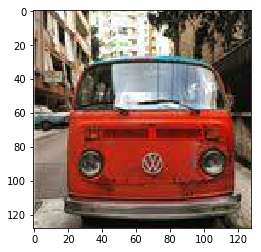

In [166]:
plt.imshow(x[0]/ 2 +0.5)

In [167]:
model.predict(x)

array([[1.0769326e-05, 9.9998927e-01]], dtype=float32)

In [168]:
from lime import lime_image

In [169]:
explainer = lime_image.LimeImageExplainer()

In [170]:
explanation = explainer.explain_instance(x[0], model.predict)

In [171]:
from skimage.segmentation import mark_boundaries

In [180]:
temp, mask = explanation.get_image_and_mask(1, positive_only=True, hide_rest=True, min_weight=0.0001)


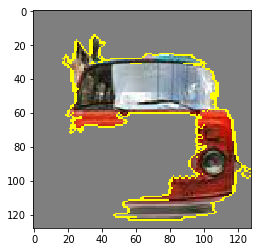

In [181]:
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [159]:
img_path = 'test9.jpeg'
img = image.load_img(img_path, target_size=(128, 128,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

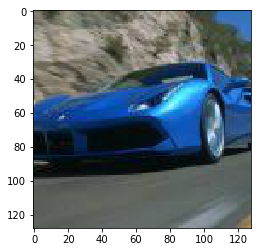

In [160]:
plt.imshow(x[0]/ 2 +0.5)

In [161]:
model.predict(x)

array([[9.9999917e-01, 8.5253726e-07]], dtype=float32)

In [162]:
explanation = explainer.explain_instance(x[0], model.predict)

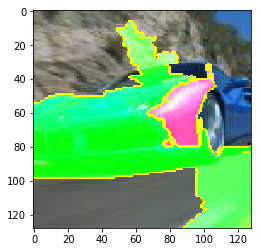

In [163]:
temp, mask = explanation.get_image_and_mask(0, positive_only=False, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [99]:
for i in range(1,40):
    img_path = f'cars/normal_car/c{i}.jpeg'
    img = image.load_img(img_path, target_size=(128, 128,3))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
#    plt.imshow(x[0]/ 2 +0.5)
    print(f"car file: cars/normal_car/c{i}.jpeg, preds: {model.predict(x)}")

car file: cars/normal_car/c1.jpeg, preds: [[9.9980456e-01 1.9541124e-04]]
car file: cars/normal_car/c2.jpeg, preds: [[9.9926382e-01 7.3612324e-04]]
car file: cars/normal_car/c3.jpeg, preds: [[0.99797016 0.00202981]]
car file: cars/normal_car/c4.jpeg, preds: [[9.9994016e-01 5.9810649e-05]]
car file: cars/normal_car/c5.jpeg, preds: [[9.9999595e-01 4.0866321e-06]]
car file: cars/normal_car/c6.jpeg, preds: [[9.9983680e-01 1.6321582e-04]]
car file: cars/normal_car/c7.jpeg, preds: [[0.9977034  0.00229663]]
car file: cars/normal_car/c8.jpeg, preds: [[9.9986637e-01 1.3367088e-04]]
car file: cars/normal_car/c9.jpeg, preds: [[0.997544   0.00245604]]
car file: cars/normal_car/c10.jpeg, preds: [[9.9937063e-01 6.2933256e-04]]
car file: cars/normal_car/c11.jpeg, preds: [[0.99643624 0.00356374]]
car file: cars/normal_car/c12.jpeg, preds: [[9.9991453e-01 8.5499974e-05]]
car file: cars/normal_car/c13.jpeg, preds: [[0.9971806  0.00281939]]
car file: cars/normal_car/c14.jpeg, preds: [[9.999925e-01 7.4903

In [100]:
for i in range(1,20):
    img_path = f'cars/sports_car/sc{i}.jpeg'
    img = image.load_img(img_path, target_size=(128, 128,3))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
#    plt.imshow(x[0]/ 2 +0.5)
    print(f"car file: cars/sports_car/sc{i}.jpeg, preds: {model.predict(x)}")

car file: cars/sports_car/sc1.jpeg, preds: [[5.8546193e-05 9.9994147e-01]]
car file: cars/sports_car/sc2.jpeg, preds: [[8.283184e-06 9.999918e-01]]
car file: cars/sports_car/sc3.jpeg, preds: [[4.3841854e-05 9.9995613e-01]]
car file: cars/sports_car/sc4.jpeg, preds: [[0.00426554 0.9957345 ]]
car file: cars/sports_car/sc5.jpeg, preds: [[2.7804947e-07 9.9999976e-01]]
car file: cars/sports_car/sc6.jpeg, preds: [[2.2980952e-08 1.0000000e+00]]
car file: cars/sports_car/sc7.jpeg, preds: [[5.6855555e-04 9.9943143e-01]]
car file: cars/sports_car/sc8.jpeg, preds: [[4.0101611e-05 9.9995995e-01]]
car file: cars/sports_car/sc9.jpeg, preds: [[1.1968975e-06 9.9999881e-01]]
car file: cars/sports_car/sc10.jpeg, preds: [[5.148869e-05 9.999485e-01]]
car file: cars/sports_car/sc11.jpeg, preds: [[2.2473434e-04 9.9977523e-01]]
car file: cars/sports_car/sc12.jpeg, preds: [[3.1215243e-06 9.9999690e-01]]
car file: cars/sports_car/sc13.jpeg, preds: [[0.00140844 0.9985916 ]]
car file: cars/sports_car/sc14.jpeg, 

 preds: [[1.5977952e-05 9.9998403e-01]]


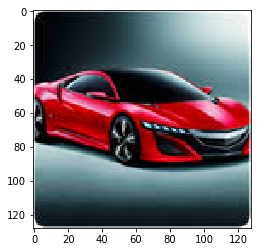

In [101]:
img_path = f'cars/sports_car/sc14.jpeg'
img = image.load_img(img_path, target_size=(128, 128,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(x[0]/ 2 +0.5)
print(f" preds: {model.predict(x)}")

In [102]:
explanation = explainer.explain_instance(x[0], model.predict)

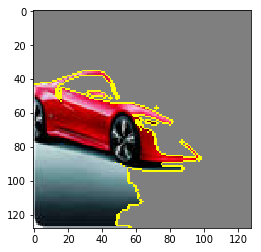

In [103]:
temp, mask = explanation.get_image_and_mask(1, positive_only=True, hide_rest=True, min_weight=0.01)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))